# torchvision을 사용한 이미지 변환

## `torchvision.transforms` 기초

이제 이미지 전처리를 위해 torchvision이 제공하는 몇 가지 변환(transform)을 사용해보겠습니다.

```{note}
2023년 3월 릴리즈된 torchvision 0.15 부터는 `torchvision.transforms` 대신 `torchvision.transforms.v2`를 사용하는 것을 권장하고 있습니다. `torchvision.transforms.v2`의 변환들은 더 빠르고 다양한 입력을 받을 수 있으며, `CutMix`나 `MixUp`과 같은 새로운 변환들이 추가되었습니다. 이전의 `torchvision.transforms`는 하위 호환성을 위해 남겨두지만 더 이상 업데이트되지 않을 예정이니 `torchvision.transforms.v2`를 사용하는 것을 권장합니다. 자세한 내용은 [torchvision 문서](https://pytorch.org/vision/stable/transforms.html#v1-or-v2-which-one-should-i-use)를 참고해주세요.
```

In [ ]:
import torch

# 이미지 변환을 위해 torchvision.transforms를 사용합니다. 이전에는 주로 아래와 같이 선언하여 사용했습니다.
# > from torchvision import transforms
# v2에서는 다음과 같이 선언하여 사용할 수 있습니다.
from torchvision.transforms import v2 as transforms

# 이미지를 불러오고 시각화하기 위해 Pillow와 Matplotlib을 사용합니다.
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# 사용할 이미지를 준비합니다.
img_fn = './sample.jpg'
img_obj = Image.open(img_fn)

### Resize 변환

Resize 변환은 이미지의 크기를 조정합니다. 이 변환은 PIL 이미지나 Tensor를 입력으로 받아서 PIL 이미지를 반환합니다. 자세한 내용은 [torchvision.transforms.v2.Resize](https://pytorch.org/vision/stable/generated/torchvision.transforms.v2.Resize.html#torchvision.transforms.v2.Resize) 문서를 참고해주세요.

(256, 256)


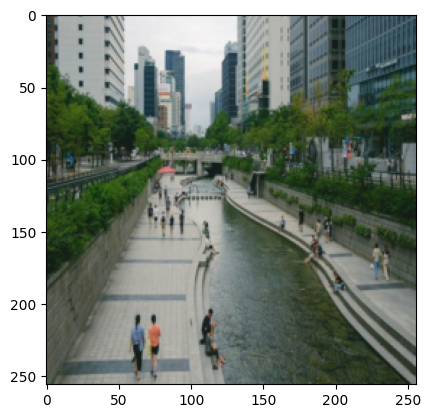

In [13]:
# torchvision.transforms.Resize는 지정된 크기로 이미지 크기를 변환하는 객체를 반환합니다.
transform_resize = transforms.Resize((256, 256)) # 256x256으로 이미지를 변환하는 객체(함수처럼 사용 가능)
resized_img = transform_resize(img_obj) # 역시 함수처럼 사용할 수 있습니다.

# 이미지 크기 및 변환된 이미지 표시
print(resized_img.size)
plt.imshow(resized_img)

### CenterCrop 변환

CenterCrop 변환은 이미지의 중앙 부분을 잘라내어 크기를 조정합니다. 이 변환은 PIL 이미지나 Tensor를 입력으로 받아서 PIL 이미지를 반환합니다. 자세한 내용은 [torchvision.transforms.v2.CenterCrop](https://pytorch.org/vision/stable/generated/torchvision.transforms.v2.CenterCrop.html#torchvision.transforms.v2.CenterCrop) 문서를 참고해주세요.

(360, 120)


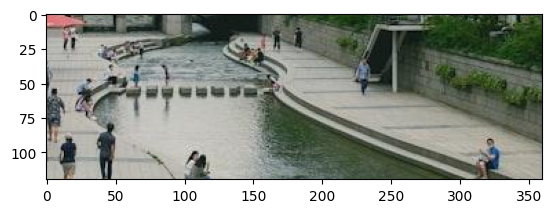

In [14]:
# torchvision.transforms.CenterCrop은 지정된 크기로 이미지의 중앙 영역을 자르는 객체를 반환합니다.
transform_crop = transforms.CenterCrop((120, 360)) # 120x360으로 이미지 중앙을 자르는 객체
cropped_img = transform_crop(img_obj)

# 이미지 크기 및 변환된 이미지 표시
print(cropped_img.size)
plt.imshow(cropped_img)

### Grayscale 변환

Grayscale 변환은 이미지를 흑백으로 변환합니다. 이 변환은 PIL 이미지나 Tensor를 입력으로 받아서 PIL 이미지를 반환합니다. 자세한 내용은 [torchvision.transforms.v2.Grayscale](https://pytorch.org/vision/stable/generated/torchvision.transforms.v2.Grayscale.html#torchvision.transforms.v2.Grayscale) 문서를 참고해주세요.

(1024, 683)


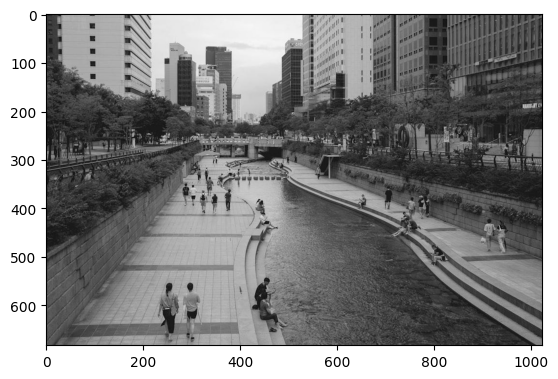

In [15]:
# torchvision.transforms.CenterCrop은 지정된 크기로 이미지의 중앙 영역을 자르는 객체를 반환합니다.
transform_grayscale = transforms.Grayscale(3) # RGB 3개 채널을 갖는 결과를 반환하도록 합니다.
gray_img = transform_grayscale(img_obj)

# 이미지 크기 및 변환된 이미지 표시
print(gray_img.size)
plt.imshow(gray_img)

### 색상 변환

ColorJitter 변환은 이미지의 밝기(brightniess), 대조(contrast), 채도(saturation), 색조(hue)를 변화시킵니다. 이 변환은 PIL 이미지나 Tensor를 입력으로 받아서 PIL 이미지를 반환합니다. 자세한 내용은 [torchvision.transforms.v2.ColorJitter](https://pytorch.org/vision/stable/generated/torchvision.transforms.v2.ColorJitter.html#torchvision.transforms.v2.ColorJitter) 문서를 참고해주세요.

(1024, 683)


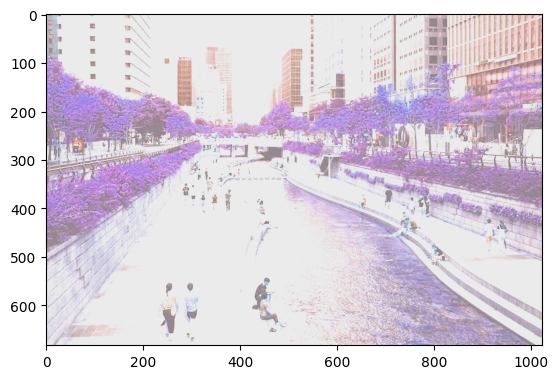

In [16]:
# torchvision.transforms.ColorJitter()는 밝기(brightniess), 대조(contrast), 채도(saturation), 색조(hue)의 값을 변환하는 객체를 반환합니다.
transform_color = transforms.ColorJitter(
                                      brightness=(3, 3),
                                      contrast=(0.5, 0.5),
                                      saturation=(1, 1),
                                      hue=(0.5, 0.5)
                                    )
colored_img = transform_color(img_obj)

# 이미지 크기 및 변환된 이미지 표시
print(colored_img.size)
plt.imshow(colored_img)

### FiveCrop: 이미지의 각 모서리와 가운데 자르기

FiveCrop 변환은 이미지의 각 모서리와 가운데를 자릅니다. 이 변환은 PIL 이미지나 Tensor를 입력으로 받아서 5개의 PIL 이미지를 반환합니다. 자세한 내용은 [torchvision.transforms.v2.FiveCrop](https://pytorch.org/vision/stable/generated/torchvision.transforms.v2.FiveCrop.html#torchvision.transforms.v2.FiveCrop) 문서를 참고해주세요.

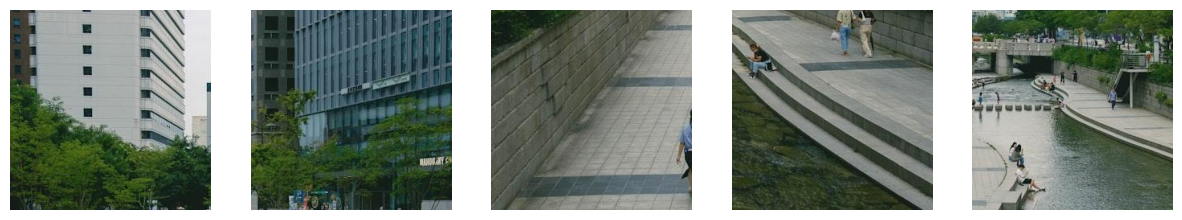

In [ ]:
# 주어진 크기로 이미지의 다섯 부분을 자릅니다: 좌측 상단, 우측 상단, 좌측 하단, 우측 하단, 중앙
transform_fivecrop = transforms.FiveCrop(250)
five_images = transform_fivecrop(img_obj)

# 자른 결과를 한꺼번에 표시
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, img in enumerate(five_images):
  axes[i].imshow(img)
plt.show()

### TenCrop: FiveCrop + 좌우반전

TenCrop 변환은 주어진 이미지와 이를 좌우반전한 이미지를 각각 FiveCrop 변환을 적용합니다. 이 변환은 PIL 이미지나 Tensor를 입력으로 받아서 10개의 PIL 이미지를 반환하며, 자세한 내용은 [torchvision.transforms.v2.TenCrop](https://pytorch.org/vision/stable/generated/torchvision.transforms.v2.TenCrop.html#torchvision.transforms.v2.TenCrop) 문서를 참고해주세요.

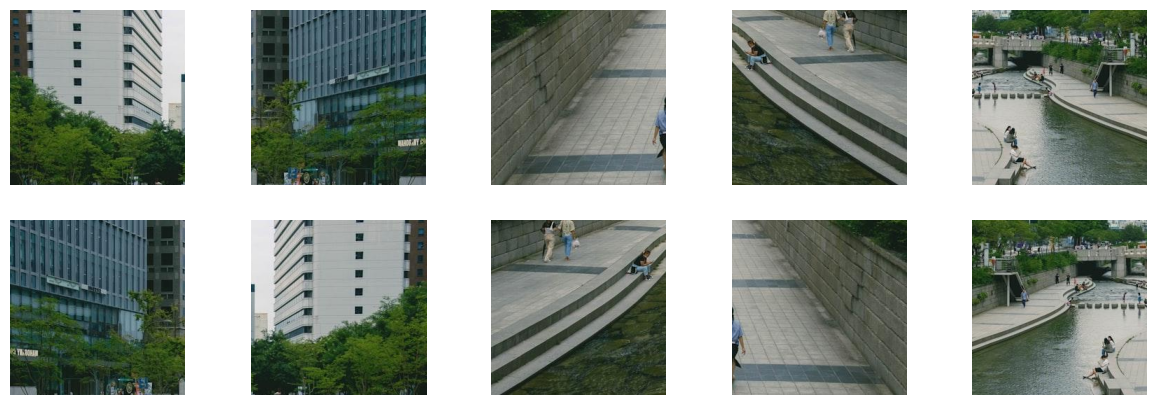

In [ ]:
# 주어진 이미지와 좌우 반전한 이미지를 각각 FiveCrop하여 반환합니다.
transform_tencrop = transforms.TenCrop(250)
ten_images = transform_tencrop(img_obj)

# 자른 결과를 한꺼번에 표시
fig, axes = plt.subplots(2, 5, figsize=(15, 10))
for i, img in enumerate(ten_images):
  axes[i//5][i%5].imshow(img)
plt.show()

### Compose: 여러가지 전처리 한 번에 처리하기

Compose는 여러가지 변환을 묶어 하나의 파이프라인으로 처리할 수 있도록 합니다. 자세한 내용은 [torchvision.transforms.v2.Compose](https://pytorch.org/vision/stable/generated/torchvision.transforms.v2.Compose.html#torchvision.transforms.v2.Compose) 문서를 참고해주세요.

((256, 256), <matplotlib.image.AxesImage at 0x7e922beef7c0>)

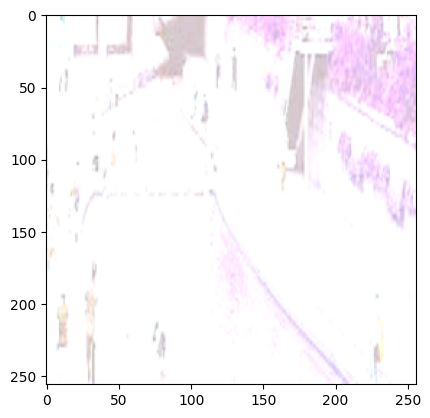

In [ ]:
# torchvision.transforms.Compose를 활용하여 여러가지 전처리를 합쳐서 한번에 수행할 수 있습니다.
preprocess = transforms.Compose([
    transforms.CenterCrop((120, 360)),
    transforms.ColorJitter(brightness=(3, 3), contrast=(0.5, 0.5), saturation=(1, 1), hue=(0.5, 0.5)),
    transforms.Resize((256, 256)),
    transforms.ToPILImage(), # 시각화를 위해 PIL.Image로 변환을 합니다. 모델에 사용 시 ToDtype을 사용하여 torch.Tensor로 변환하여 사용합니다.
])
img_obj2 = preprocess(img_obj) # PIL Image를 입력으로 넣습니다.

# 이미지 크기 및 변환된 이미지 표시
print(img_obj2.size)
plt.imshow(img_obj2)

In [ ]:
# 다음은 또 다른 전처리의 예시입니다.
preprocess = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),   # 50% 확률로 좌우 반전
    transforms.RandomCrop(32, padding=4),     # 패딩 후 32x32로 랜덤 자르기
    transforms.ToDtype(torch.float32),        # torch.Tensor로 변환
    transforms.Normalize((0.5, 0.5, 0.5),     # R, G, B 각각 정규화
                         (0.5, 0.5, 0.5))
])

preprocess

Compose(
    RandomHorizontalFlip(p=0.5)
    RandomCrop(size=(32, 32), padding=4)
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)

### `transforms.functional`: 함수형 API

지금까지 살펴본 `torchvision.transforms`는 변환 작업을 객체 형태로 정의하여 사용하는 선언형 API였습니다. 이는 한 번 정의하여 반복적으로 사용이 가능한 장점은 있지만, 직접적으로 이미지를 다룰 때 매번 선언하는 것이 번거로울 수 있습니다.

`torchvision.transforms.functional`은 이럴 때 사용할 수 있는 함수형 API 모음입니다. 매 호출 시점에 변환을 위한 매개변수를 직접 지정하는 번거로움이 있지만, 직접적으로 이미지를 다룰 때 사용하기 편리합니다.

아래 Resize 변환 예시를 참고해주세요.

(256, 256)


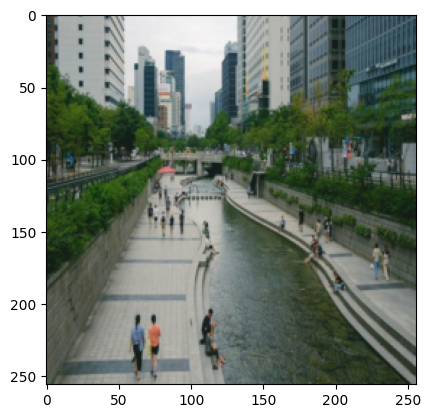

In [29]:
# torchvision.transforms를 사용한 Resize 변환
transform_resize = transforms.Resize((256, 256)) # 256x256으로 이미지를 변환하는 객체(함수처럼 사용 가능)
resized_img = transform_resize(img_obj) # 역시 함수처럼 사용할 수 있습니다.

# 이미지 크기 및 변환된 이미지 표시
print(resized_img.size)
plt.imshow(resized_img)

(256, 256)


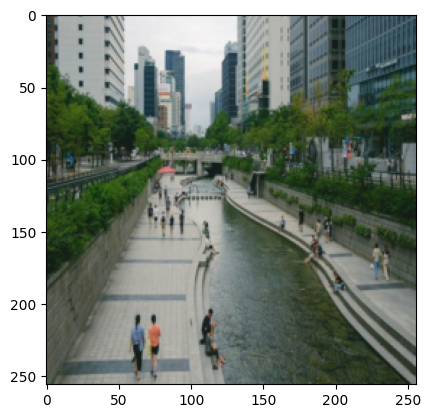

In [28]:
# 함수형 변환을 위해 torchvision.transforms.functional을 사용합니다. 이전에는 주로 아래와 같이 선언하여 사용했습니다.
# > from torchvision.transforms import functional as F
# v2에서는 다음과 같이 선언하여 사용할 수 있습니다.
from torchvision.transforms.v2 import functional as F

# 직접 호출하여 크기 조정
resized_img2 = F.resize(img_obj, [256, 256])  # 매 호출마다 매개변수 직접 지정

# 이미지 크기 및 변환된 이미지 표시
print(resized_img2.size)
plt.imshow(resized_img2)

`torchvision.transforms`는 이미지 데이터의 전처리와 증강을 위한 다양한 변환 기능을 제공합니다. 앞에서 살펴보지 않은 변형들 중에는 무작위로 이미지를 자르거나, 뒤집거나, 색상을 변경하는 등의 역할을 하는 변환들이 있으며, 이는 학습 시 데이터 다양성을 높여 모델의 일반화 성능을 향상시키는 데 필수적이기 때문에 어떠한 변환들이 있고, 어떻게 사용하는지 살펴보는게 필요합니다.

- [`torchvision.transforms.v2` API 문서 바로가기](https://pytorch.org/vision/stable/transforms.html#v2-api-reference-recommended)

```{figure} images/torchvision-examples-tutorials.png
---
alt: torchvision 문서의 예제와 튜토리얼(Examples and training references) 메뉴
name: torchvision 문서의 예제와 튜토리얼(Examples and training references) 메뉴
width: 640px
align: center
---
자세한 사용법은 [`예제와 튜토리얼(Examples and training references)` 문서들](https://pytorch.org/vision/stable/transforms.html)을 참고하세요.
```
